In [2]:
import matplotlib.pyplot as plt
import json, glob, yt
import numpy as np
ds = yt.load('C:/Users/azton/Projects/phoenix/phx256-1/RD1250/RD1250')


C:\Users\azton\Anaconda3\envs\DeepAI\lib\site-packages\yt\utilities\logger.py:4: VisibleDeprecationWarning: The configuration file C:\Users\azton\.config\yt\ytrc is deprecated in favor of C:\Users\azton\.config\yt\yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  from yt.config import ytcfg
yt : [INFO     ] 2021-09-15 08:44:27,067 Parameters: current_time              = 16.548159927217
yt : [INFO     ] 2021-09-15 08:44:27,068 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2021-09-15 08:44:27,069 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-09-15 08:44:27,070 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2021-09-15 08:44:27,071 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-09-15 08:44:27,072 Parameters: current_redshift          = 12.451325487595
yt : [INFO     ] 2021-09-15 08:

In [4]:
datadest = 'C:/Users/azton/Projects/phoenix_analysis/enriched_stats'
sim = 'phoenix_512'
simdicts = glob.glob('%s/*_%s.json'%(datadest, sim))
with open(simdicts[0], 'r') as f:
    data = json.load(f)
for i, file in enumerate(simdicts):
    if i == 0: continue
    with open(file, 'r') as f:
        ndata = json.load(f)
    for k in data.keys():
        if type(data[k]) == list:
            data[k] += ndata[k]
        else:
            for kk in data[k].keys():
                data[k][kk] += ndata[k][kk]



In [5]:
sort_inds = np.argsort(data['t'])
for k in data.keys():
    if type(data[k]) == list:
        data[k] = [data[k][i] for i in sort_inds]
    else:
        for kk in data[k].keys():
            data[k][kk] = [data[k][kk][i] for i in sort_inds]



C:\Users\azton\Anaconda3\envs\DeepAI\lib\site-packages\unyt\array.py:1674: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


RuntimeError: a_from_t calculation did not converge!

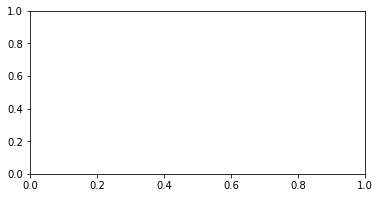

In [16]:
fig, ax = plt.subplots(figsize=(6,3))
time = [max(data['t'])-t for t in data['t']]
zbins = ds.cosmology.z_from_t(ds.arr(time, 'Myr'))

# enr1 = np.array(data1['f_enr_od'][k])
# for i, z in enumerate(data2['z']):
#     idx = np.where(data1['z'] == z)[0][0]
#     enr1[idx] = enr1[idx] + data2['f_enr_od'][k
for k in data['f_enr_od']:
    ax.plot(time, data['f_enr_od'][k], label = '$\\rho/\\bar\\rho > $%s'%k if k != '<1' else '$\\rho/\\bar\\rho %s$'%k)
ax.legend(bbox_to_anchor=(1,1))
ax.set_ylabel("F$_{enriched}$")
ax.set_xlabel('$Lookback Time [Myr]$')
ax.set_yscale('log')
plt.savefig('enriched_stats/f_enrich-overdense.pdf', bbox_inches='tight')


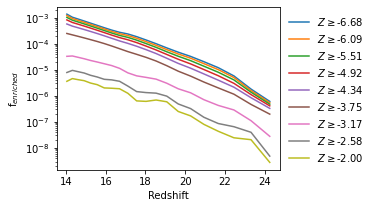

In [27]:
fig, ax = plt.subplots(figsize=(4,3))
time = np.array([t for t in data['t']])
zbins = ds.cosmology.z_from_t(ds.arr(time, 'Myr'))
# axt = ax.twiny()
for i, k in enumerate(data['f_enr_high']):
    if i == 0:
        axt.plot(zbins, 
            data['f_enr_high'][k], 
            label = '$Z \geq $%0.2f'%np.log10(float(k)))
    else:
        ax.plot(zbins, 
            data['f_enr_high'][k], 
            label = '$Z \geq $%0.2f'%np.log10(float(k)))
# ax.set_xlim(time.max(), time.min())
# axt.set_xlim(zbins.min(), zbins.max())
ax.legend(bbox_to_anchor=(1,1), frameon=False)
ax.set_ylabel("f$_{enriched}$")
ax.set_xlabel('Redshift')
ax.set_yscale('log')
# ax.set_xscale('log')
plt.savefig('enriched_stats/f_enrich-zdist.pdf', bbox_inches='tight')

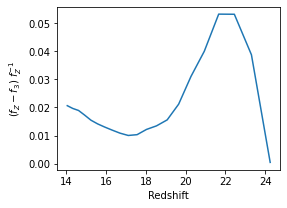

In [26]:
fig, ax = plt.subplots(figsize=(4,3))
# zdiff = [ data['p3_f_enr'][j] - (data['f_enr'][j] -data['p3_f_enr'][j]) for j in range(len(data['f_enr']))]
ax.plot(data['z'], (np.array(data['f_enr'])-np.array(data['p3_f_enr']))/np.array(data['f_enr']))
# ax.plot(data['z'], data['f_enr'], label='$Z_\\sum$')
# ax.legend()
ax.set_ylabel("$(f_Z - f_{3})~f_Z^{-1}$")
ax.set_xlabel('Redshift')
# ax.set_yscale('log')
plt.savefig('enriched_stats/f_enrich-p3-psum.pdf', bbox_inches='tight')

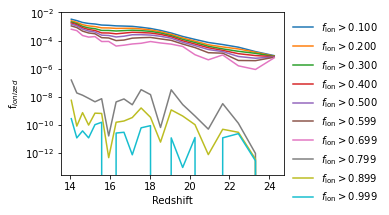

In [15]:
fig, ax = plt.subplots(figsize=(4,3))
for k in data['ion_frac']:
#     if np.all(np.array(data['ion_frac'][k]) < 1):
        ax.plot(zbins, data['ion_frac'][k], label = '$f_{\\rm ion} > $%0.3f'%(float(k)))
ax.legend(bbox_to_anchor=(1,1), frameon=False)
ax.set_ylabel("f$_{ionized}$")
ax.set_xlabel('Redshift')
ax.set_yscale('log')
plt.savefig('enriched_stats/f_ionized.pdf', bbox_inches='tight')